In [ ]:
import numpy as np
import librosa, librosa.display
import matplotlib.pyplot as plt

In [ ]:
song="rock.00001.wav"

In [ ]:
#load audio file with librosa
signal, sample_rate = librosa.load(song)

In [ ]:
print(signal)

[0.36239624 0.6494751  0.6317444  ... 0.04336548 0.0557251  0.05700684]


In [ ]:
print(sample_rate)

22050


Text(0.5, 1.0, 'Waveform')

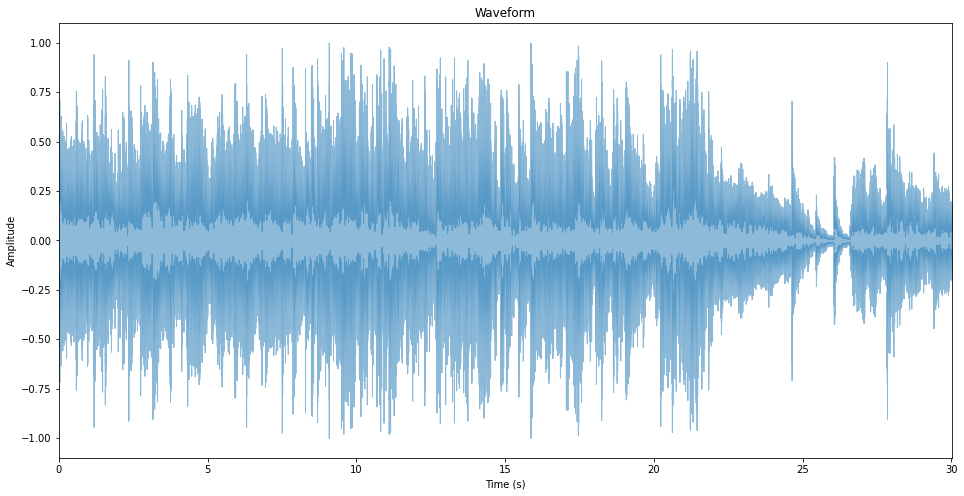

In [ ]:
plt.figure(figsize=(16,8))
librosa.display.waveplot(signal, sample_rate, alpha=0.5)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Waveform")
#alpha is for transparency

In [ ]:
#converting from time domain to frequency domain (Fourier Transform)
fft=np.fft.fft(signal)

In [ ]:
#we calculate the magnitude as the fourier transform has complex numbers as output
spectrum=np.abs(fft)

In [ ]:
#creating frequency
f=np.linspace(0,sample_rate,len(spectrum))

Text(0.5, 1.0, 'Power Spectrum')

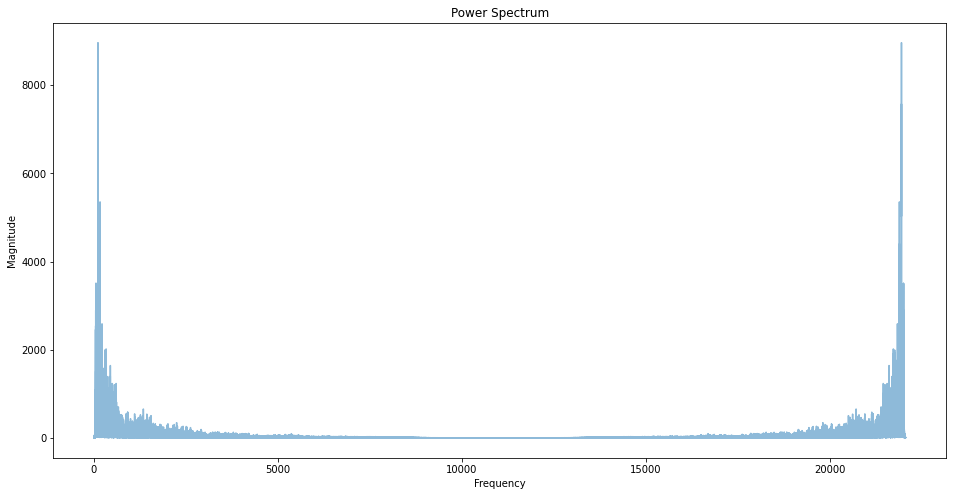

In [ ]:
# Plot Spectrum
plt.figure(figsize=(16,8))
plt.plot(f, spectrum, alpha=0.5)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power Spectrum")

In [ ]:
#the symmetry is a property of the real-valued input signal, and is preserved when we take the Fourier transform and plot the magnitude so we only take half of spectrum and frequency
left_spectrum = spectrum[:int(len(spectrum)/2)]
left_f = f[:int(len(spectrum)/2)]

Text(0.5, 1.0, 'Power Spectrum')

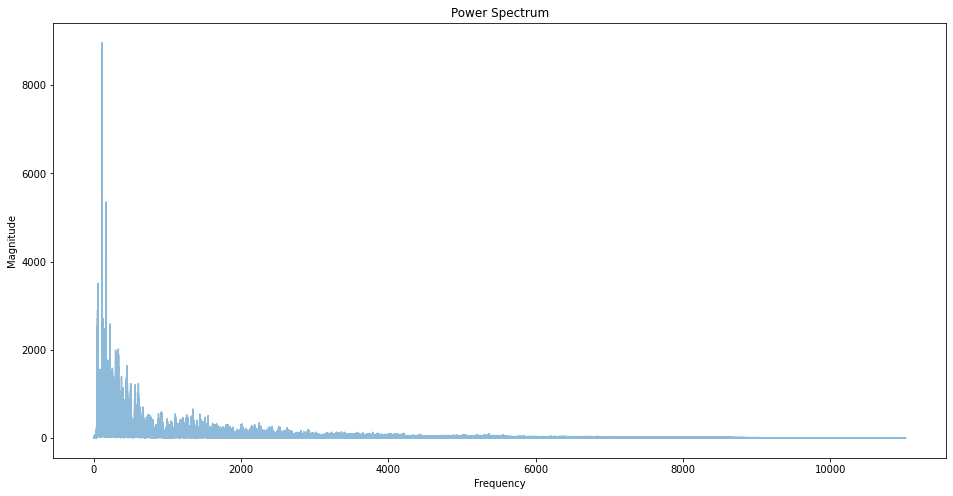

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(left_f, left_spectrum, alpha=0.5)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power Spectrum")

The short-time Fourier transform (STFT) is a widely used technique for analyzing signals that vary over time. It is a time-frequency analysis method that decomposes a signal into its frequency components over time by applying the Fourier transform over short, overlapping windows of the signal.

In [ ]:
# Spectrogram (STFT)
hop_length = 512 # num. of samples
n_fft = 2048 # num. of samples for window

In [ ]:
stft = librosa.stft(signal, n_fft=n_fft, hop_length=hop_length)

In [ ]:
spectrogram = np.abs(stft)

Text(0.5, 1.0, 'Spectrogram')

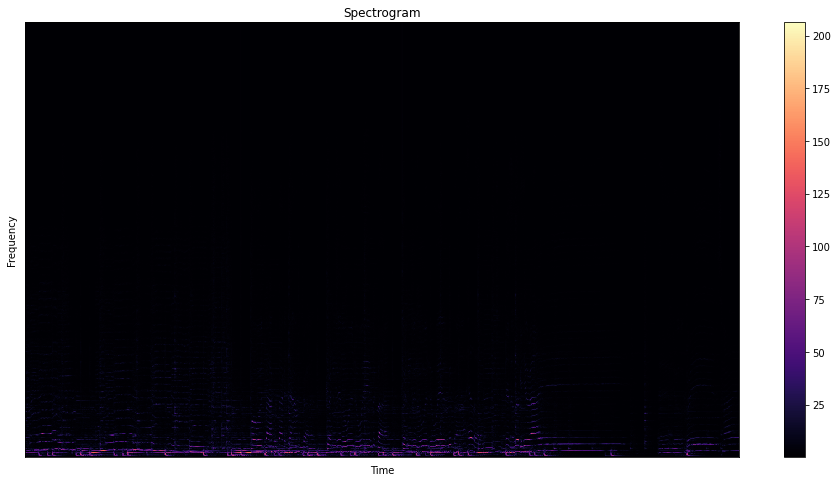

In [ ]:
# Plot the Spectrogram
plt.figure(figsize=(16,8))
librosa.display.specshow(spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.title("Spectrogram")

In [ ]:
# Apply Logarithm to get values in Decibels
log_spectrogram = librosa.amplitude_to_db(spectrogram)

Text(0.5, 1.0, 'Spectrogram (dB)')

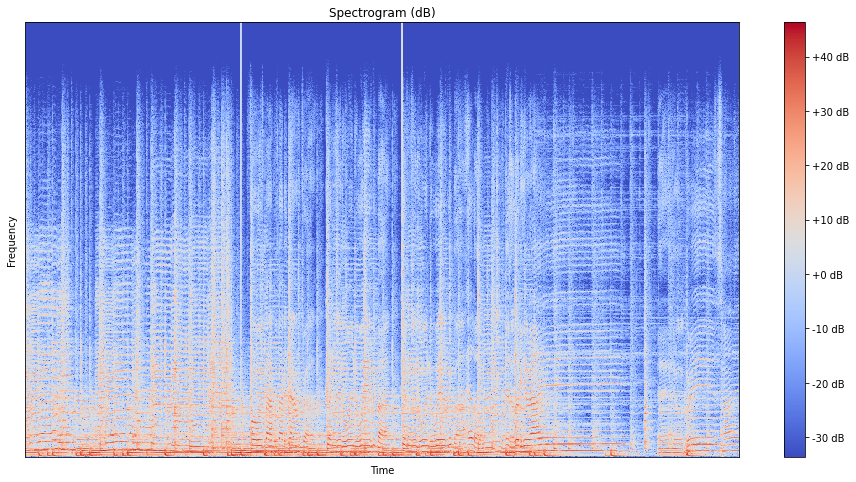

In [ ]:
# Plot the Spectrogram in Decibels
plt.figure(figsize=(16,8))
librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram (dB)")

In [ ]:
# MFCCs (we use 13 MFCCs)
MFCCs = librosa.feature.mfcc(signal, sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=13)

Text(0.5, 1.0, 'MFCCs')

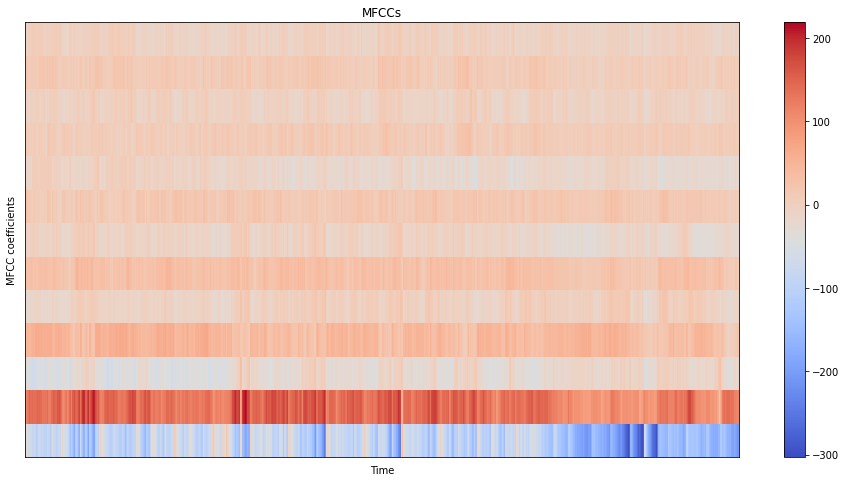

In [ ]:
# Plot MFCCs
plt.figure(figsize=(16,8))
librosa.display.specshow(MFCCs, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.title("MFCCs")

In [ ]:
import json
import os
import math

In [ ]:
DATASET_PATH = "/content/drive/MyDrive/genres_original"
JSON_PATH = "music_data.json"
SAMPLE_RATE = 22050
TRACK_DURATION = 30 # measured in seconds
SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION

In [ ]:
def save_mfcc(dataset_path, json_path, num_mfcc=13, n_fft=2048, hop_length=512, num_segments=5):
    """Extracts MFCCs from music dataset and saves them into a json file along with genre labels.
        """

    data = {
        "mapping": [],
        "labels": [],
        "mfcc": []
    }

    samples_per_segment = int(SAMPLES_PER_TRACK / num_segments)
    num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / hop_length)

    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):

        if dirpath is not dataset_path:

            semantic_label = dirpath.split("/")[-1]
            data["mapping"].append(semantic_label)
            print("\nProcessing: {}".format(semantic_label))

            for f in filenames:

                file_path = os.path.join(dirpath, f)
                signal, sample_rate = librosa.load(file_path, sr=SAMPLE_RATE)

                for d in range(num_segments):

                    # calculate start and finish sample for current segment
                    start = samples_per_segment * d
                    finish = start + samples_per_segment

                    # extract mfcc
                    mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
                    mfcc = mfcc.T

                    # store only mfcc feature with expected number of vectors
                    if len(mfcc) == num_mfcc_vectors_per_segment:
                        data["mfcc"].append(mfcc.tolist())
                        data["labels"].append(i-1)
                        print("{}, segment:{}".format(file_path, d+1))

    # save MFCCs to json file
    with open(json_path, "w") as fp:
        json.dump(data, fp, indent=4)

In [ ]:
save_mfcc(DATASET_PATH, JSON_PATH, num_segments=10)

Streaming output truncated to the last 5000 lines.
/content/drive/MyDrive/genres_original/blues/blues.00007.wav, segment:7
/content/drive/MyDrive/genres_original/blues/blues.00007.wav, segment:8
/content/drive/MyDrive/genres_original/blues/blues.00007.wav, segment:9
/content/drive/MyDrive/genres_original/blues/blues.00007.wav, segment:10
/content/drive/MyDrive/genres_original/blues/blues.00003.wav, segment:1
/content/drive/MyDrive/genres_original/blues/blues.00003.wav, segment:2
/content/drive/MyDrive/genres_original/blues/blues.00003.wav, segment:3
/content/drive/MyDrive/genres_original/blues/blues.00003.wav, segment:4
/content/drive/MyDrive/genres_original/blues/blues.00003.wav, segment:5
/content/drive/MyDrive/genres_original/blues/blues.00003.wav, segment:6
/content/drive/MyDrive/genres_original/blues/blues.00003.wav, segment:7
/content/drive/MyDrive/genres_original/blues/blues.00003.wav, segment:8
/content/drive/MyDrive/genres_original/blues/blues.00003.wav, segment:9
/content/dri